# SentinelNet: AI-Powered Network Intrusion Detection System (NIDS)

##  Project Overview
SentinelNet is an AI-powered Network Intrusion Detection System (NIDS) designed to detect malicious network traffic using supervised and unsupervised ML models.

<b>Step-1 : Dataset Acquisition and Loading</b>


The dataset used in this project is **CICIDS2017**, obtained from the official source of the Canadian Institute for Cybersecurity.  
Dataset: https://www.unb.ca/cic/datasets/ids-2017.html


<b>Importing necessary libraries</b>

In [1]:
import pandas as pd  #Importing pandas library for data handling and analysis

In [2]:
#Loading the dataset into a pandas DataFrame 
#Selected the Wednesday dataset as it contains a balanced mix of normal and multiple attack types, unlike other datasets.
df = pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv") 

In [3]:
# Displaying the first few rows to get a quick look at the data structure
# This helps us understand what kind of features and labels the dataset contains
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


<b>Exploratory Data Analysis (EDA)</b>

In [4]:
df.shape #Checking the number of rows and columns in the dataset

(692703, 79)

In [5]:
df.columns #Displays all the features present in the dataset

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
# Checking column data types and non-null values
# Helps identify categorical, numerical, and missing data for preprocessing steps
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul

In [7]:
# Viewing basic statistics of numeric columns like mean, std, min, max
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,41.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,56.666667,128.916917,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,65487.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


<b>Step-2 : Data Cleaning and Preprocessing</b>

In [8]:
df.isnull().sum() # Identifying missing values in each column

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [9]:
# remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

In [10]:
print(df['Label'].unique()) #Displaying all unique labels to understand the different attack categories present in the dataset

['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [11]:
print(df.duplicated().sum()) #Checking if duplicate rows exist in the dataset

81909


In [12]:
df.shape

(692703, 79)

In [13]:
df = df.drop_duplicates() #Removing duplicate rows to maintain unique, high-quality data samples

In [14]:
print(df.duplicated().sum())

0


In [15]:
df.shape

(610794, 79)

In [16]:
# Dropping irrelevant flow-related features that contain zero or near-constant values
df.columns = df.columns.str.strip()
irrelevant_cols = [
    'Flow Bytes/s', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'
] # These columns do not contribute useful information for intrusion detection in this project
df = df.drop(columns=irrelevant_cols)

In [17]:
df.shape #After droping the irrelevant features, checking number of rows and cols

(610794, 72)

In [18]:
#Saving Cleaned Data
df.to_csv("Wednesday_Cleaned.csv", index=False)

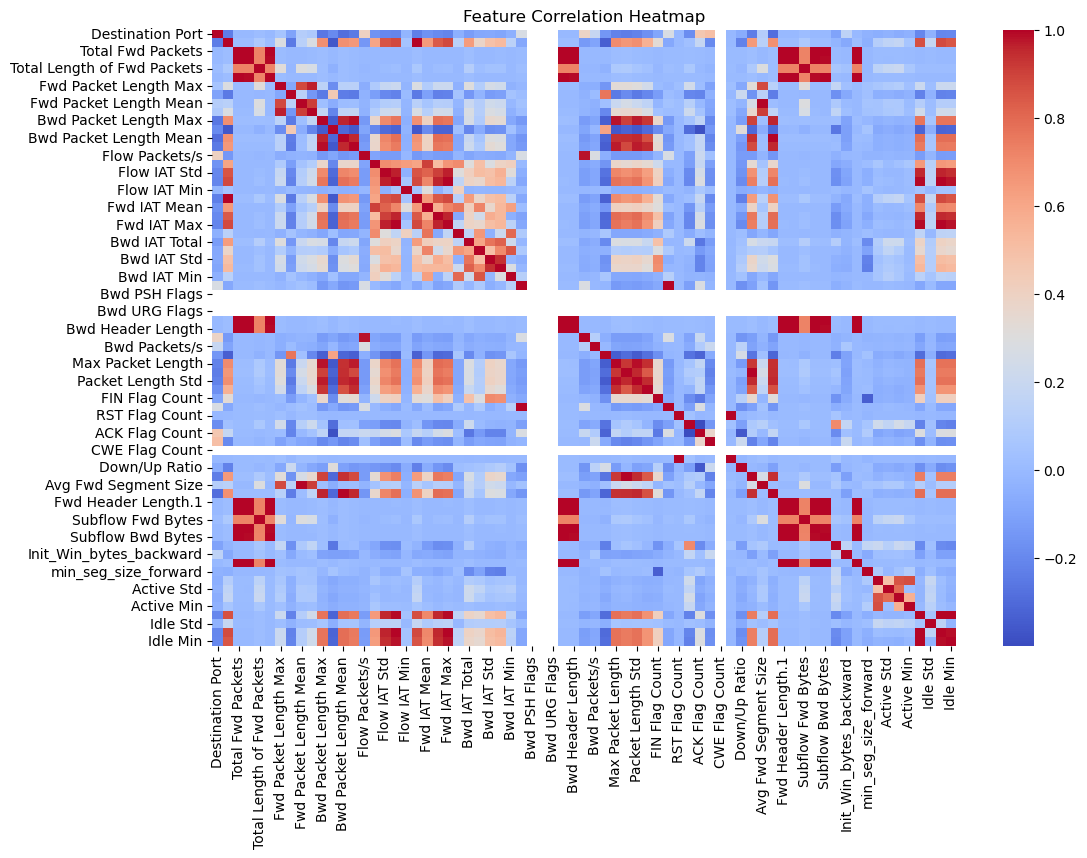

In [19]:
# Analyzing correlations between numeric features to identify strongly related attributes
# Correlation shows how strongly two features are related — high correlation means they change together and vice-versa.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


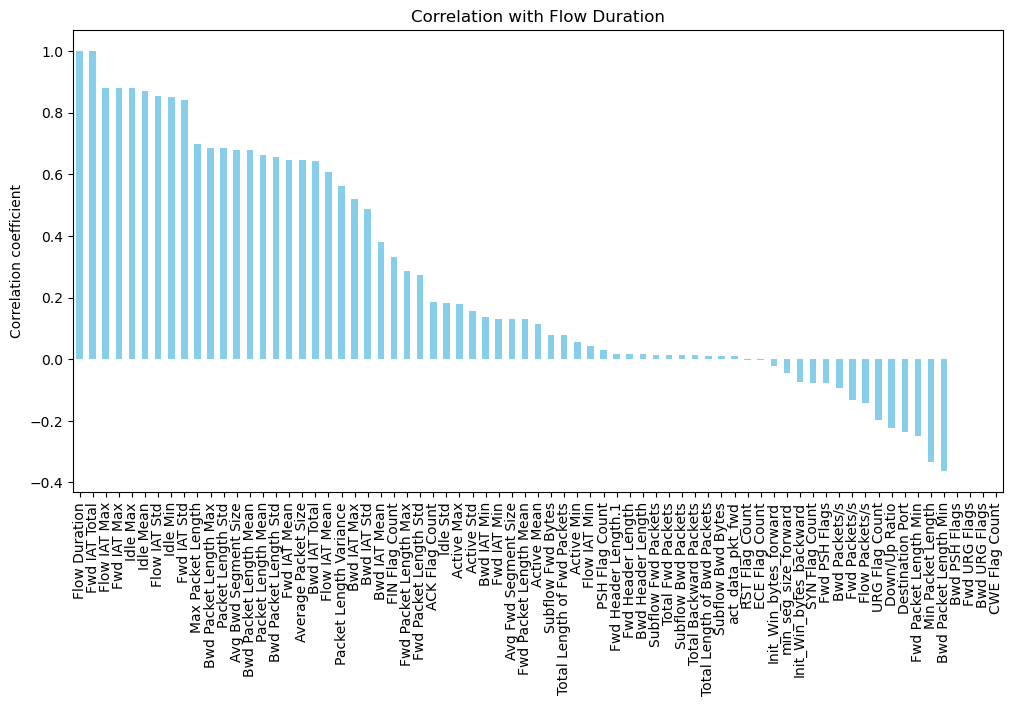

In [20]:
#Plotting the correlation using bargraph

import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64'])
target_corr = numeric_df.corr()['Flow Duration'].sort_values(ascending=False)

plt.figure(figsize=(12,6))
target_corr.plot(kind='bar', color='skyblue')
plt.title("Correlation with Flow Duration")
plt.ylabel("Correlation coefficient")
plt.show()


In [21]:
from scipy import stats
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate Z-scores to detect outliers
z_scores = np.abs(stats.zscore(numeric_df))
outliers = np.where(z_scores > 3)
print("Total outliers in dataset:", len(outliers[0]))

#To see how many outliers per column
outlier_counts = (z_scores > 3).sum(axis=0)
outlier_info = dict(zip(numeric_df.columns, outlier_counts))

/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_stats_py.py:1127: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


Total outliers in dataset: 403294


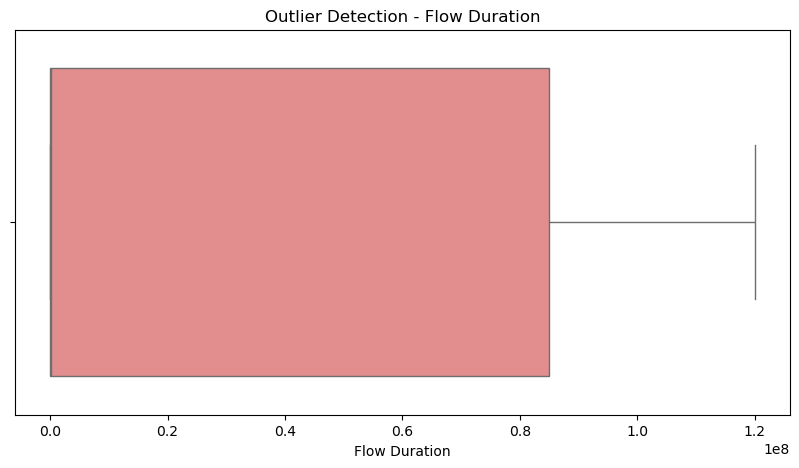

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers for 'Flow Duration' only to keep the code clean and focused
plt.figure(figsize=(10,5))
df.columns = df.columns.str.strip()
sns.boxplot(x=df['Flow Duration'], color='lightcoral')
plt.title("Outlier Detection - Flow Duration")
plt.show()


<b>Step-3 : Feature Engineering and Selection</b>

In [23]:
# Separating dataset columns into categorical and numerical features for preprocessing in SentiNet AI

categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64','float64']).columns

print("Categorical:", categorical_features)
print("Numerical:", numerical_features)


Categorical: Index(['Label'], dtype='object')
Numerical: Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Packets/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Varianc

In [24]:
# Encoding the categorical target column 'Label' into numeric values using LabelEncoder for model training in SentiNet AI
# Encoding is necessary because most ML algorithms require numeric input, so categories need to be converted to numbers
# After encoding, each class in 'Label' is represented by a unique integer

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() #Encodes according to the alphabetical order
df['Label'] = le.fit_transform(df['Label'])
print(df['Label'].unique())


[0 4 3 2 1 5]


In [25]:
import numpy as np

# Replace inf/-inf with NaN
df[numerical_features] = df[numerical_features].replace([np.inf, -np.inf], np.nan)

# Optionally drop rows with NaN
df[numerical_features] = df[numerical_features].dropna()


In [26]:
# Saving the preprocessed and encoded dataset to a new CSV file 'Wednesday_Encoded.csv' 
df.to_csv("Wednesday_Encoded.csv", index=False) 

Correlation with target:
 Label                    1.000000
Fwd IAT Max              0.747306
Flow IAT Max             0.746996
Idle Max                 0.746480
Fwd IAT Std              0.738144
                           ...   
Bwd Packet Length Min   -0.362313
Bwd PSH Flags                 NaN
Fwd URG Flags                 NaN
Bwd URG Flags                 NaN
CWE Flag Count                NaN
Name: Label, Length: 72, dtype: float64


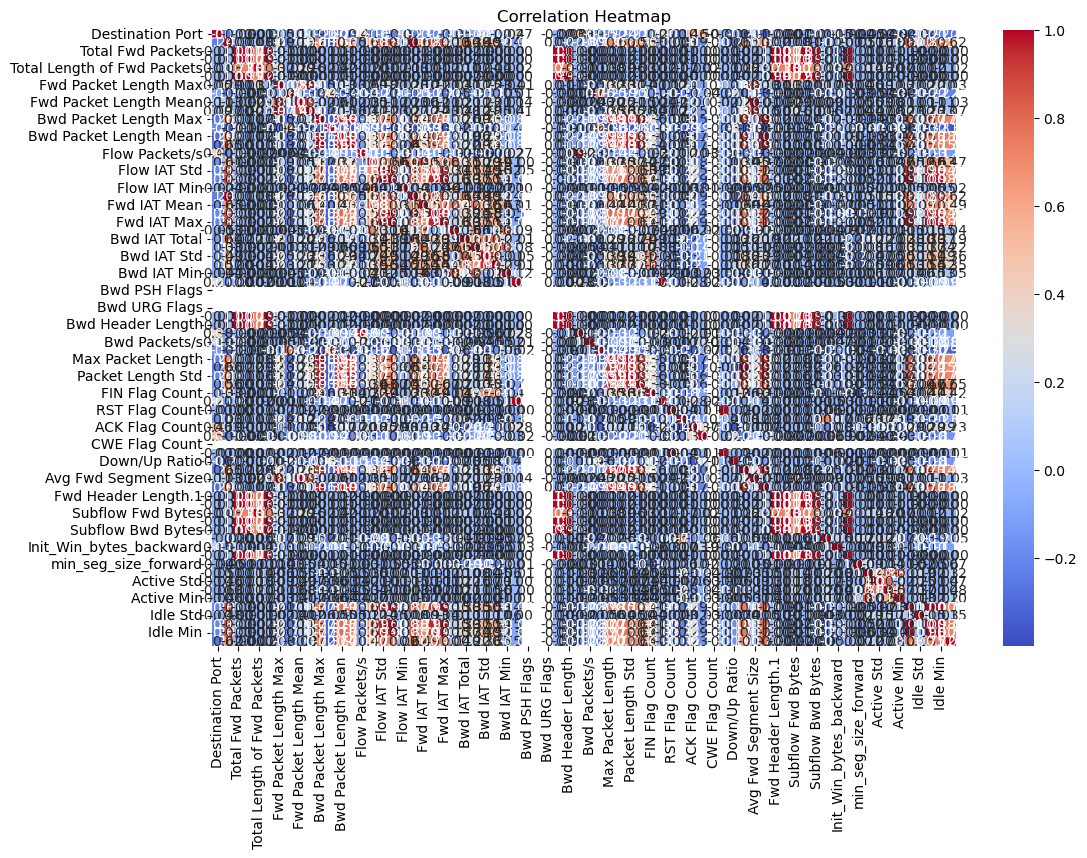

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation with target
corr_matrix = df.corr()
target_corr = corr_matrix['Label'].sort_values(ascending=False)  # replace 'target_column'

print("Correlation with target:\n", target_corr)

# Heatmap of all numerical features
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [28]:
# Select only numeric columns (including encoded 'Label')
numeric_df = df.select_dtypes(include=['int64','float64'])

df.columns = df.columns.str.strip()

# Compute correlation only on numeric columns
if 'Label' in numeric_df.columns:
    corr_matrix = numeric_df.corr()
    target_corr = corr_matrix['Label'].sort_values(ascending=False)

    # Identify important vs non-important features
    important_features = target_corr[abs(target_corr) > 0.3].index.tolist()
    non_important_features = target_corr[abs(target_corr) <= 0.3].index.tolist()

    print("Important Features:", important_features)
    print("Non-Important Features:", non_important_features)
else:
    print("Column 'Label' not found in numeric data.")


Important Features: ['Label', 'Fwd IAT Max', 'Flow IAT Max', 'Idle Max', 'Fwd IAT Std', 'Bwd Packet Length Mean', 'Avg Bwd Segment Size', 'Idle Mean', 'Idle Min', 'Bwd Packet Length Max', 'Packet Length Std', 'Flow IAT Std', 'Bwd Packet Length Std', 'Packet Length Mean', 'Max Packet Length', 'Average Packet Size', 'Packet Length Variance', 'Fwd IAT Total', 'Flow Duration', 'Fwd IAT Mean', 'Flow IAT Mean', 'FIN Flag Count', 'Bwd IAT Std', 'Bwd IAT Max', 'Min Packet Length', 'Bwd Packet Length Min']
Non-Important Features: ['ACK Flag Count', 'Bwd IAT Mean', 'Bwd IAT Total', 'Idle Std', 'Active Mean', 'Active Min', 'Active Max', 'Fwd Packet Length Std', 'min_seg_size_forward', 'Active Std', 'Bwd IAT Min', 'Fwd IAT Min', 'Fwd Packet Length Max', 'Flow IAT Min', 'Fwd Header Length.1', 'Fwd Header Length', 'Subflow Bwd Bytes', 'Total Length of Bwd Packets', 'Bwd Header Length', 'Subflow Fwd Packets', 'Total Fwd Packets', 'Total Backward Packets', 'Subflow Bwd Packets', 'act_data_pkt_fwd', 'R

In [29]:
# Drop non-important features
df_filtered = df[important_features]
print("Shape after dropping non-important features: ",df_filtered.shape)

Shape after dropping non-important features:  (610794, 26)


In [30]:
# Features (X) and target (y)
X = df_filtered.drop(columns=['Label'])
y = df_filtered['Label']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (610794, 25)
Target shape: (610794,)


In [45]:
X.isnull().sum()

Fwd IAT Max               302
Flow IAT Max              302
Idle Max                  302
Fwd IAT Std               302
Bwd Packet Length Mean    302
Avg Bwd Segment Size      302
Idle Mean                 302
Idle Min                  302
Bwd Packet Length Max     302
Packet Length Std         302
Flow IAT Std              302
Bwd Packet Length Std     302
Packet Length Mean        302
Max Packet Length         302
Average Packet Size       302
Packet Length Variance    302
Fwd IAT Total             302
Flow Duration             302
Fwd IAT Mean              302
Flow IAT Mean             302
FIN Flag Count            302
Bwd IAT Std               302
Bwd IAT Max               302
Min Packet Length         302
Bwd Packet Length Min     302
dtype: int64

In [48]:
from sklearn.impute import SimpleImputer

# Fill missing values with median (robust for numeric data)
imputer = SimpleImputer(strategy='median')

X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [51]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Verify no NaNs remain
print("Number of NaNs after scaling:", np.isnan(X_scaled).sum())


Number of NaNs after scaling: 0


In [52]:
from sklearn.decomposition import PCA

# Fit PCA on scaled data
pca = PCA()  # Keep all components for full analysis
X_pca = pca.fit_transform(X_scaled)

In [54]:
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

Shape before PCA: (610794, 25)
Shape after PCA: (610794, 25)


In [58]:
explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca.explained_variance_))],
    'Explained_Variance': pca.explained_variance_ratio_
}).sort_values(by='Explained_Variance', ascending=False)

# Display top 10 PCA components
top_10_pca = explained_variance.head(10)
print("Top 10 PCA Components based on explained variance:")
print(top_10_pca)

Top 10 PCA Components based on explained variance:
     PC  Explained_Variance
0   PC1            0.668629
1   PC2            0.110996
2   PC3            0.065890
3   PC4            0.054785
4   PC5            0.027728
5   PC6            0.017172
6   PC7            0.015530
7   PC8            0.011800
8   PC9            0.011022
9  PC10            0.005732


In [62]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
# Initialize Random Forest with 50 trees as suggested
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [64]:
# Extract feature importance
importances = rf.feature_importances_

# Create a DataFrame to visualize importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 most important features
top_10_features = feature_importance_df.head(10)
print("Top 10 Features contributing to attacks:")
print(top_10_features)


Top 10 Features contributing to attacks:
                   Feature  Importance
4   Bwd Packet Length Mean    0.126677
8    Bwd Packet Length Max    0.107220
9        Packet Length Std    0.104702
11   Bwd Packet Length Std    0.083792
5     Avg Bwd Segment Size    0.071056
15  Packet Length Variance    0.070164
13       Max Packet Length    0.062167
1             Flow IAT Max    0.053238
12      Packet Length Mean    0.053140
14     Average Packet Size    0.042037


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9965946021169132


In [67]:
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Precision (macro): 0.9936496272917824
Recall (macro): 0.99526046066904
F1 Score (macro): 0.9944458111549724
